In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/amazon-stock-price-all-time/Amazon.csv


In [2]:
df = pd.read_csv("/kaggle/input/amazon-stock-price-all-time/Amazon.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(6155, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6155.0,5.205563e+02,8.571617e+02,1.406250,3.875000e+01,9.267000e+01,5.289500e+02,3.744000e+03
High,6155.0,5.262161e+02,8.658210e+02,1.447917,3.951500e+01,9.419000e+01,5.353050e+02,3.773080e+03
Low,6155.0,5.142773e+02,8.472709e+02,1.312500,3.810500e+01,9.075000e+01,5.219500e+02,3.696790e+03
Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Adj Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Volume,6155.0,7.329010e+06,7.149521e+06,487200.000000,3.579350e+06,5.470000e+06,8.294950e+06,1.043292e+08


In [8]:
train, test = train_test_split(df, test_size = 0.2)

In [9]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3302,2010-06-30,108.580002,112.680000,108.110001,109.260002,109.260002,9740700
184,1998-02-06,4.927083,5.020833,4.875000,4.906250,4.906250,2122800
538,1999-07-06,64.000000,66.656250,62.750000,63.437500,63.437500,14886200
1995,2005-04-21,33.500000,33.889999,32.889999,33.730000,33.730000,7694700
2444,2007-02-02,37.230000,37.740002,36.680000,37.389999,37.389999,25850700
4359,2014-09-11,329.940002,333.010010,326.390015,330.519989,330.519989,2720200
3175,2009-12-28,139.750000,141.979996,138.529999,139.309998,139.309998,8763900
3653,2011-11-17,212.509995,212.899994,202.100006,204.520004,204.520004,7983100
1905,2004-12-10,39.540001,40.099998,39.000000,39.049999,39.049999,5510700
4280,2014-05-20,297.100006,304.459991,296.750000,301.190002,301.190002,4095700


In [10]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4073,2013-07-24,303.019989,303.839996,298.040009,298.940002,298.940002,2000500
4409,2014-11-20,324.000000,332.670013,323.329987,330.540009,330.540009,3436700
6135,2021-09-30,3316.000000,3327.850098,3273.989990,3285.040039,3285.040039,2842400
2374,2006-10-20,32.689999,32.689999,32.209999,32.570000,32.570000,5839400
5563,2019-06-25,1911.839966,1916.390015,1872.420044,1878.270020,1878.270020,3012300
4862,2016-09-09,779.359985,781.000000,760.109985,760.140015,760.140015,4257300
3853,2012-09-05,247.610001,248.610001,245.300003,246.220001,246.220001,2652600
3819,2012-07-18,216.149994,218.669998,215.710007,217.470001,217.470001,2093000
1078,2001-08-23,10.130000,10.160000,9.570000,9.630000,9.630000,4000700
1440,2003-02-06,22.160000,22.480000,21.930000,22.090000,22.090000,4037700


In [11]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [12]:
y_train = train['Close'].values
y_test = test['Close'].values

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
result = model.predict([[2.437500, 2.500000, 1.927083, 72156000]])
print(result)

[1.13046681]


In [16]:
pred_df = test.copy()
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume
4073,2013-07-24,303.019989,303.839996,298.040009,298.940002,298.940002,2000500
4409,2014-11-20,324.000000,332.670013,323.329987,330.540009,330.540009,3436700
6135,2021-09-30,3316.000000,3327.850098,3273.989990,3285.040039,3285.040039,2842400
2374,2006-10-20,32.689999,32.689999,32.209999,32.570000,32.570000,5839400
5563,2019-06-25,1911.839966,1916.390015,1872.420044,1878.270020,1878.270020,3012300
...,...,...,...,...,...,...,...
5473,2019-02-14,1624.500000,1637.900024,1606.060059,1622.650024,1622.650024,4120500
2997,2009-04-15,75.500000,75.809998,73.510002,74.709999,74.709999,9412800
5153,2017-11-03,1091.150024,1112.680054,1088.520020,1111.599976,1111.599976,3751500
4019,2013-05-07,256.309998,259.739990,252.910004,257.730011,257.730011,3133700


In [17]:
pred_df['Close_Prediction'] = y_pred
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
4073,2013-07-24,303.019989,303.839996,298.040009,298.940002,298.940002,2000500,299.929087
4409,2014-11-20,324.000000,332.670013,323.329987,330.540009,330.540009,3436700,330.822175
6135,2021-09-30,3316.000000,3327.850098,3273.989990,3285.040039,3285.040039,2842400,3292.401457
2374,2006-10-20,32.689999,32.689999,32.209999,32.570000,32.570000,5839400,32.415101
5563,2019-06-25,1911.839966,1916.390015,1872.420044,1878.270020,1878.270020,3012300,1884.799626
...,...,...,...,...,...,...,...,...
5473,2019-02-14,1624.500000,1637.900024,1606.060059,1622.650024,1622.650024,4120500,1621.080181
2997,2009-04-15,75.500000,75.809998,73.510002,74.709999,74.709999,9412800,74.257757
5153,2017-11-03,1091.150024,1112.680054,1088.520020,1111.599976,1111.599976,3751500,1106.970183
4019,2013-05-07,256.309998,259.739990,252.910004,257.730011,257.730011,3133700,256.646510


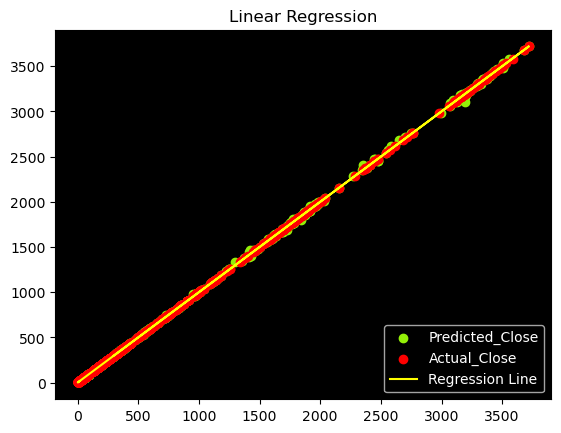

In [18]:
ax = plt.axes()
 
# Setting the background color of the
# plot using set_facecolor() method
ax.set_facecolor("black")
plt.title('Linear Regression')
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc ="lower right", facecolor='black', labelcolor='white')